In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# This will need to be done in the future so 
# get accustomed to using now
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:
happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

In [3]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [6]:
print(shape_2015)
print(shape_2016)
print(shape_2017)

(164, 13)
(164, 14)
(164, 13)


In [7]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

In [8]:
'''
    1. Check for errors in data cleaning/transformation.
    2. Use data from additional sources to fill missing values.
    3. Drop row/column.
    4. Fill missing values with reasonable estimates computed from the available data.
'''

'\n    1. Check for errors in data cleaning/transformation.\n    2. Use data from additional sources to fill missing values.\n    3. Drop row/column.\n    4. Fill missing values with reasonable estimates computed from the available data.\n'

In [9]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index = True)
missing = combined.isnull().sum()

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


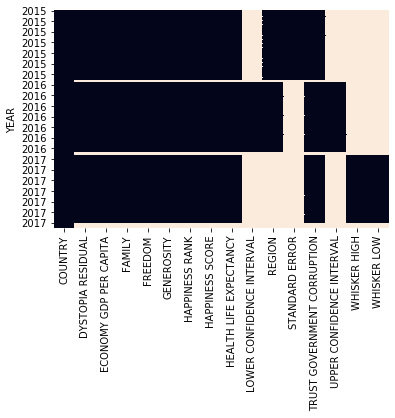

In [10]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

In [11]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()

We've already created a dataframe named regions containing all of the countries and corresponding regions from the happiness2015 and happiness2016 dataframes

In [12]:
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
combined = combined.drop('REGION_x', axis = 1)
missing = combined.isnull().sum()

NameError: name 'regions' is not defined

In [13]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
print(combined[dups])

               COUNTRY  DYSTOPIA RESIDUAL  ECONOMY GDP PER CAPITA  FAMILY  \
162  SOMALILAND REGION                NaN                     NaN     NaN   
326  SOMALILAND REGION                NaN                     NaN     NaN   
489  SOMALILAND REGION                NaN                     NaN     NaN   

     FREEDOM  GENEROSITY  HAPPINESS RANK  HAPPINESS SCORE  \
162      NaN         NaN             NaN              NaN   
326      NaN         NaN             NaN              NaN   
489      NaN         NaN             NaN              NaN   

     HEALTH LIFE EXPECTANCY  LOWER CONFIDENCE INTERVAL REGION  STANDARD ERROR  \
162                     NaN                        NaN    NaN             NaN   
326                     NaN                        NaN    NaN             NaN   
489                     NaN                        NaN    NaN             NaN   

     TRUST GOVERNMENT CORRUPTION  UPPER CONFIDENCE INTERVAL  WHISKER HIGH  \
162                          NaN            

In [14]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

In [15]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis = 1)
missing = combined.isnull().sum()

In [16]:
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()

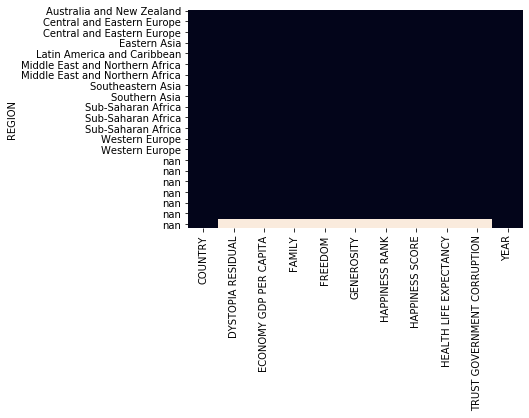

In [17]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

In [18]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

5.370727659882893
5.370727659882894


In [19]:
combined = combined.dropna()
missing = combined.isnull().sum()